# Customer Churn Project

You are provided with a sample dataset of a telecom company’s customers and it's expected to done the following tasks:

1. Perform exploratory analysis and extract insights from the dataset.
2. Split the dataset into train/test sets and explain your reasoning.
3. Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
4. Establish metrics to evaluate model performance.
5. Discuss the potential issues with deploying the model into production.

## Initial data ETL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_path = '~/strata/datasets/customer_churn.csv'

In [3]:
df = pd.read_csv(df_path)

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Transform international and voice plan into binary int64 dtype

df['international plan'] = df['international plan'].replace(['yes','no'],[1,0])
df['voice mail plan'] = df['voice mail plan'].replace(['yes','no'],[1,0])

In [7]:
df[['international plan','voice mail plan']].head()

,international plan,voice mail plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [8]:
# Look into how many unique items there are for each column

df.apply(pd.Series.nunique)

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [9]:
# Dropping state column since it has 51 unique values. This is to reduce high-dimensionality issues. 
# Additionally, drop phone number since it is unique for each row and does not contribute to data analysis
# Area code can also be used as a feature. Since there are 3 unique data in the column, we will use get dummies
# to change the column into a binary dtype


area_code_dummies = pd.get_dummies(df['area code'])
area_code_dummies = area_code_dummies.add_prefix('area_code_')
df_final = df.drop(['state', 'area code','phone number'], axis = 1)
df_final = pd.concat([df_final, area_code_dummies], axis=1)

In [10]:
area_code_cols = [col for col in df_final.columns if 'area_code_' in col]
for col in area_code_cols:
    df_final[col] = df_final[col].astype('int64')
df_final.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0


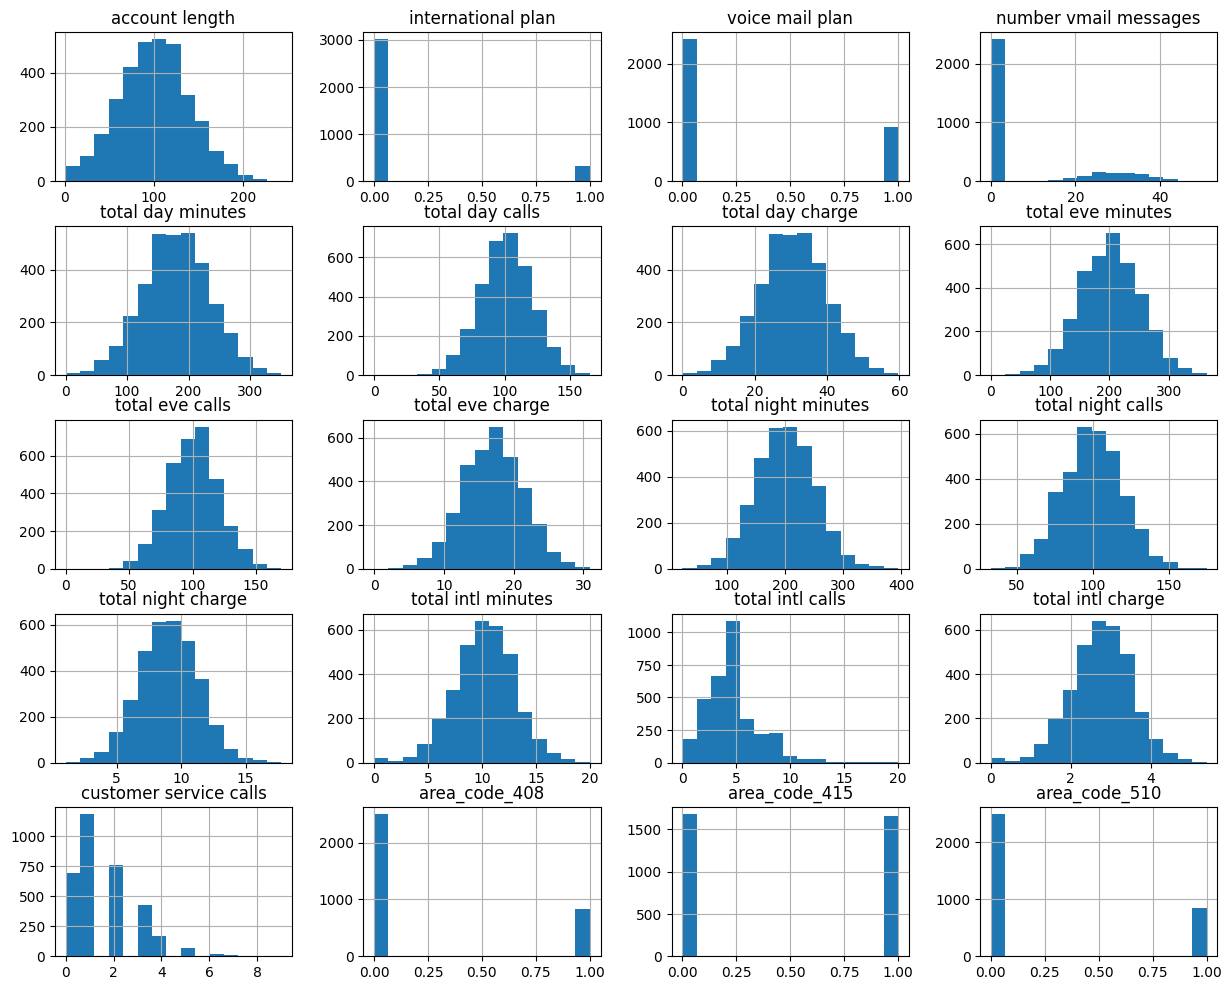

In [11]:
df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [12]:
df_final.groupby('churn')['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

In [13]:
charge_cols = [col for col in df_final.columns if 'charge' in col]
for col in charge_cols:
    print('Total charge for ' + col + ': ' + str(df_final[col].sum()))

Total charge for total day charge: 101864.17000000001
Total charge for total eve charge: 56939.44
Total charge for total night charge: 30128.07
Total charge for total intl charge: 9214.349999999999


This information tells us the following:

1. Not a lot of people get the international and voice mail plans
2. Half the users use are code 415
3. The company earns more in total day charge
4. The data is imbalanced

## Data Visualization

<Axes: >

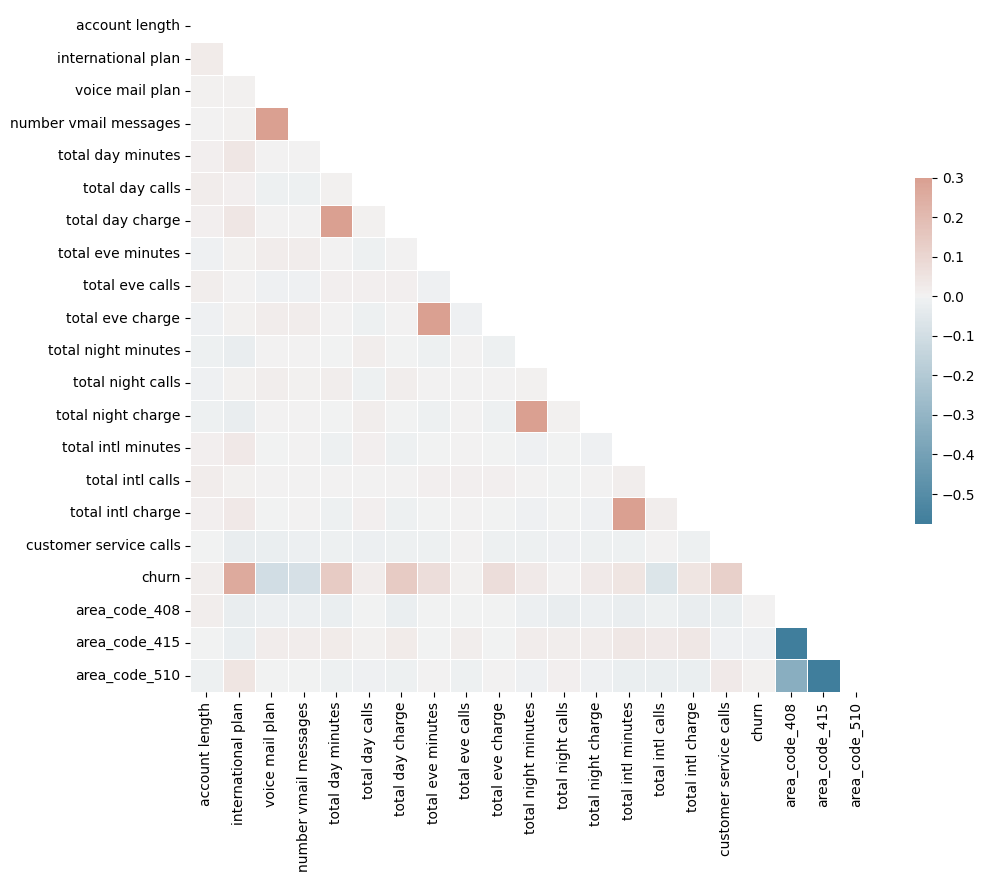

In [14]:
corr = df_final.corr('kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Insights:

Positive correlation:

1. Total day minutes, total day charge and churn
2. Number of voicemail messages and voice mail plan
3. Total eve charge and total eve minutes
4. total night charge and total night minutes
5. total international charge and total international minutes
6. customer service calls and churn
7. international plan and churn

Negative correlation:

8. Voice mail plan and churn
9. voice mail messages and churn
10. Total international calls and churn

Some of the correlations are expected such as 2, 3, 4, 5. However, we can look into 1, 6, 7, 8, 9, 10.

<Axes: >

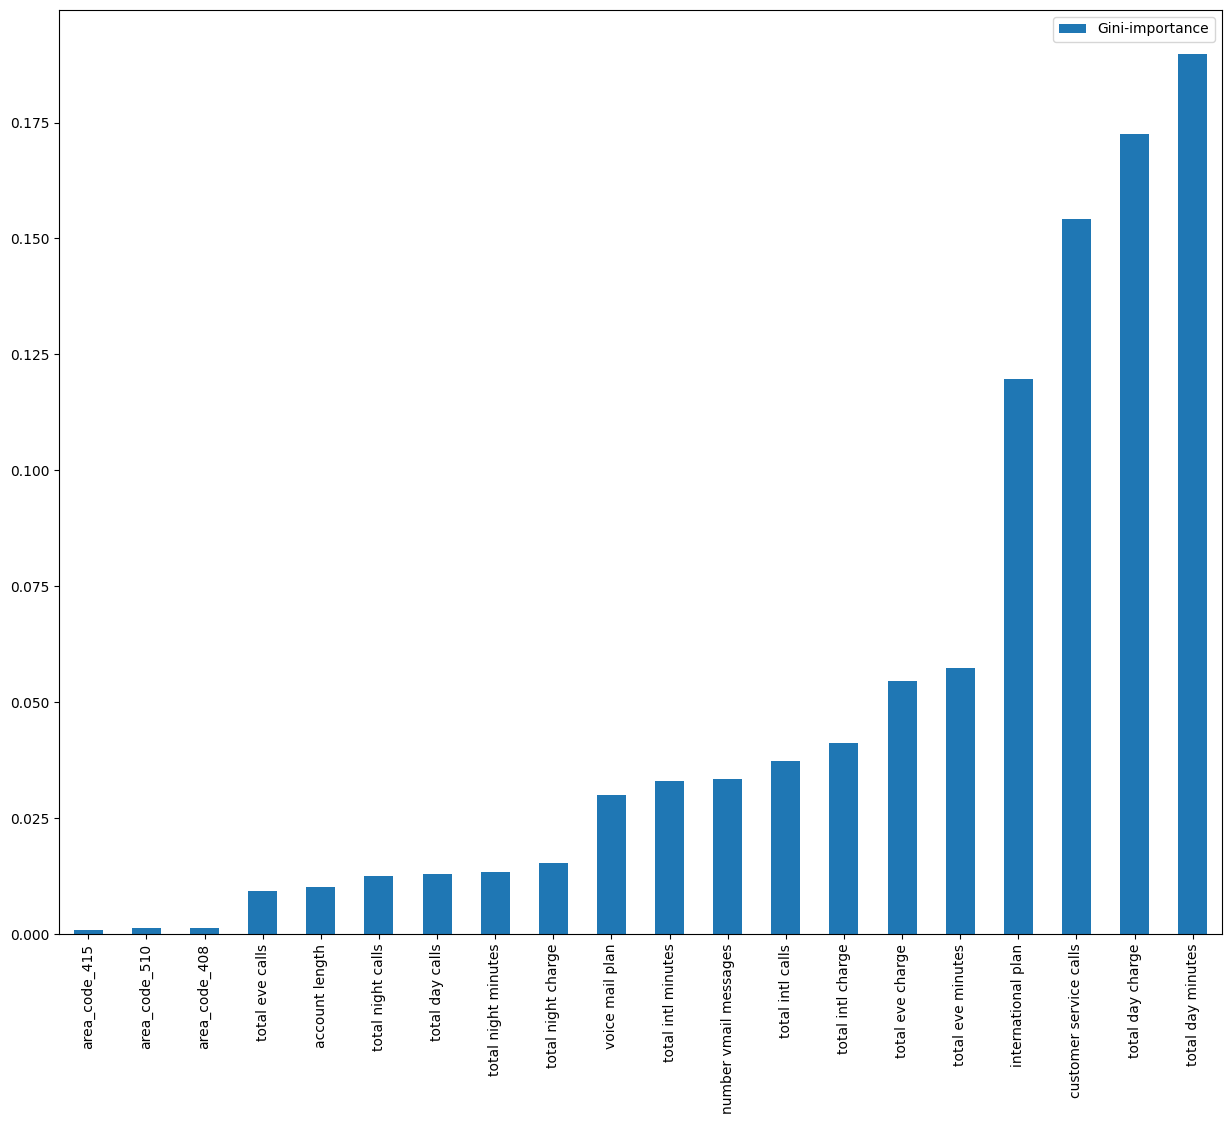

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

# drop label column
X = df_final.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

In [17]:
X = df_final.drop(columns=["churn"])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
#     "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
#     LGBMClassifier(random_state=42),
]

/Users/jonathandedinata/strata/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [20]:
from sklearn.metrics import f1_score

In [21]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.87 f1_score: 0.67 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.90 f1_score: 0.76 Model: Gaussian Process
accuracy: 0.92 f1_score: 0.82 Model: Decision Tree
accuracy: 0.90 f1_score: 0.70 Model: Random Forest
accuracy: 0.92 f1_score: 0.81 Model: Neural Net
accuracy: 0.87 f1_score: 0.69 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.84 f1_score: 0.65 Model: QDA


/Users/jonathandedinata/strata/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy: 0.95 f1_score: 0.88 Model: XGBoost


accuracy: 0.95 f1_score: 0.88


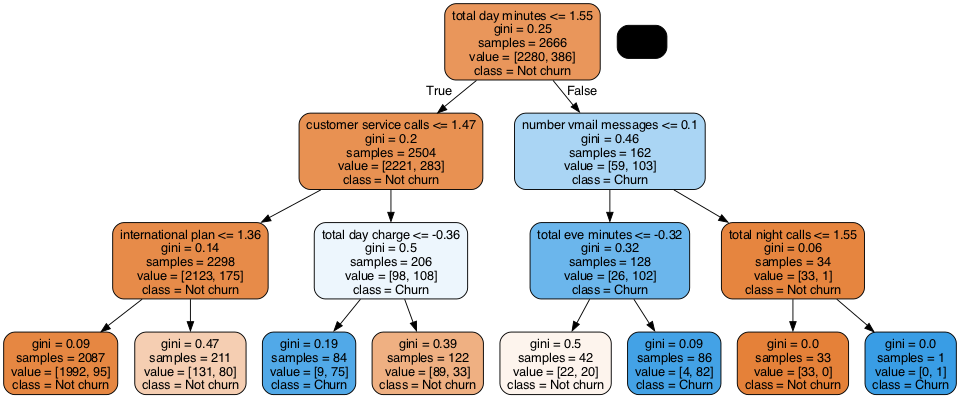

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

#Function attributes
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth,criterion_type,split_type) :
    
 
    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
    
    #plot decision tree
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_final.drop(columns=["churn"]).columns.to_list(), 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True,
                                       
                  )
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)
    
plot_decision_tree(3,"gini","best")

In [23]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
# to have reproducible results
import tensorflow 
tensorflow.random.set_seed(42)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train accuracy:', accuracy)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)

2023-07-12 16:32:38.065493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


267/267 [==============================] - 0s 677us/step - loss: 0.2966 - accuracy: 0.8743
Train accuracy: 0.8743435740470886
21/21 [==============================] - 0s 697us/step
********************
67/67 [==============================] - 0s 729us/step - loss: 0.3383 - accuracy: 0.8606
Test accuracy: 0.8605697154998779
[[546  24]
 [ 69  28]]
Test F1-score: 0.3758389261744966
